# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
import numpy as np

In [2]:
main_db = pd.read_csv(r'FIES2018 Datasets/2018 PSA FIES Microdata.csv')

In [3]:
main_db

,Region,Province,Sequence no.,Family SIze,Salaries/Wages from Regular Employment,Salaries/Wages from Seasonal Employment,Salaries/Wages from both Agri and Non-Agri Activities,"Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)","Cash Receipts, Support, etc. from Abroad","Cash Receipts, Support, etc. from Domestic Source",...,Replicate,Base Weight,Final Weight,Final Weight - Population,NTOIN,RTOIN,PTOINC,NPCINC,RPCINC,pPCINC
0,1,28,1,1.0,0,0,0,0,228384,0,...,51,93.764,97.7504,100.023869,7,7,6,10,10,10
1,1,28,2,6.0,0,79800,79800,0,0,33200,...,51,93.764,97.7504,100.023869,3,3,2,2,1,1
2,1,28,3,3.0,86840,32710,119550,0,0,9000,...,51,93.764,97.7504,100.023869,4,3,3,5,5,4
3,1,28,4,4.0,0,0,0,55250,480000,69000,...,51,93.764,97.7504,100.023869,10,10,10,10,10,9
4,1,28,5,3.0,101896,34000,135896,0,0,19000,...,51,93.764,97.7504,100.023869,6,7,6,8,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147712,17,59,147713,2.5,159400,26667,186067,5900,19000,66000,...,37,41.539,41.7227,41.369701,8,9,10,9,10,10
147713,17,59,147714,7.0,5400,0,5400,0,0,36000,...,37,41.539,41.7227,41.369701,4,6,7,2,2,3
147714,17,59,147715,3.0,867671,0,867671,0,0,0,...,37,41.539,41.7227,41.369701,10,10,10,10,10,10
147715,17,59,147716,6.0,29500,2000,31500,0,0,18500,...,37,41.539,41.7227,41.369701,1,1,1,1,1,1


In [4]:
main_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147717 entries, 0 to 147716
Data columns (total 85 columns):
 #   Column                                                            Non-Null Count   Dtype  
---  ------                                                            --------------   -----  
 0   Region                                                            147717 non-null  int64  
 1   Province                                                          147717 non-null  int64  
 2   Sequence no.                                                      147717 non-null  int64  
 3   Family SIze                                                       147717 non-null  float64
 4   Salaries/Wages from Regular Employment                            147717 non-null  int64  
 5   Salaries/Wages from Seasonal Employment                           147717 non-null  int64  
 6   Salaries/Wages from both Agri and Non-Agri Activities             147717 non-null  int64  
 7   Net Share of Crops, 

In [5]:
a = main_db['Province'].unique()
print(sorted(a))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 97, 98]


In [6]:
main_db['Region Name'] = main_db['Region']
main_db['Province Name'] = main_db['Province']

cols = main_db.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]

main_db = main_db[cols]

Source: https://psa.gov.ph/classification/psgc/downloads/National%20and%20Provincial%20summary%20as%20of%2031%20March%202021.pdf

In [7]:
main_db['Region Name'].loc[main_db['Region Name'] == 1] = "Ilocos Region (Region I)"
main_db['Region Name'].loc[main_db['Region Name'] == 2] = "Cagayan Valley (Region II)"
main_db['Region Name'].loc[main_db['Region Name'] == 3] = "Central Luzon (Region III)"
main_db['Region Name'].loc[main_db['Region Name'] == 4] = "CALABARZON (Region IV-A)"
main_db['Region Name'].loc[main_db['Region Name'] == 5] = "Bicol Region (Region V)"
main_db['Region Name'].loc[main_db['Region Name'] == 6] = "Western Visayas (Region VI)"
main_db['Region Name'].loc[main_db['Region Name'] == 7] = "Central Visayas (Region VII)"
main_db['Region Name'].loc[main_db['Region Name'] == 8] = "Eastern Visayas (Region VIII)"
main_db['Region Name'].loc[main_db['Region Name'] == 9] = "Zamboanga Peninsula (Region IX)"
main_db['Region Name'].loc[main_db['Region Name'] == 10] = "Northern Mindanao (Region X)"
main_db['Region Name'].loc[main_db['Region Name'] == 11] = "Davao Region (Region XI)"
main_db['Region Name'].loc[main_db['Region Name'] == 12] = "SOCCSKSARGEN (Region XII)"
main_db['Region Name'].loc[main_db['Region Name'] == 13] = "Metropolitan Manila"
main_db['Region Name'].loc[main_db['Region Name'] == 14] = "Cordillera Administrative Region (CAR)"
main_db['Region Name'].loc[main_db['Region Name'] == 15] = "Autonomous Region of Muslim Mindanao (ARMM)"
main_db['Region Name'].loc[main_db['Region Name'] == 16] = "Caraga (Region XIII)"
main_db['Region Name'].loc[main_db['Region Name'] == 17] = "MIMAROPA (Region IV-B)"

c:\users\jeffc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\jeffc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [8]:
main_db = main_db[main_db['Province Name'] < 86]

main_db['Province Name'].loc[main_db['Province Name'] == 1] = "Abra"
main_db['Province Name'].loc[main_db['Province Name'] == 2] = "Agusan del Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 3] = "Agusan del Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 4] = "Aklan"
main_db['Province Name'].loc[main_db['Province Name'] == 5] = "Albay"
main_db['Province Name'].loc[main_db['Province Name'] == 6] = "Antique"
main_db['Province Name'].loc[main_db['Province Name'] == 7] = "Basilan"
main_db['Province Name'].loc[main_db['Province Name'] == 8] = "Bataan"
main_db['Province Name'].loc[main_db['Province Name'] == 9] = "Batanes"
main_db['Province Name'].loc[main_db['Province Name'] == 10] = "Batangas"
main_db['Province Name'].loc[main_db['Province Name'] == 11] = "Benguet"
main_db['Province Name'].loc[main_db['Province Name'] == 12] = "Bohol"
main_db['Province Name'].loc[main_db['Province Name'] == 13] = "Bukidnon"
main_db['Province Name'].loc[main_db['Province Name'] == 14] = "Bulacan"
main_db['Province Name'].loc[main_db['Province Name'] == 15] = "Cagayan"
main_db['Province Name'].loc[main_db['Province Name'] == 16] = "Camarines Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 17] = "Camarines Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 18] = "Camiguin"
main_db['Province Name'].loc[main_db['Province Name'] == 19] = "Capiz"
main_db['Province Name'].loc[main_db['Province Name'] == 20] = "Catanduanes"
main_db['Province Name'].loc[main_db['Province Name'] == 21] = "Cavite"
main_db['Province Name'].loc[main_db['Province Name'] == 22] = "Cebu"
main_db['Province Name'].loc[main_db['Province Name'] == 23] = "Davao del Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 24] = "Davao del Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 25] = "Davao Oriental"
main_db['Province Name'].loc[main_db['Province Name'] == 26] = "Eastern Samar"
main_db['Province Name'].loc[main_db['Province Name'] == 27] = "Ifugao"
main_db['Province Name'].loc[main_db['Province Name'] == 28] = "Ilocos Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 29] = "Ilocos Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 30] = "Iloilo"
main_db['Province Name'].loc[main_db['Province Name'] == 31] = "Isabela"
main_db['Province Name'].loc[main_db['Province Name'] == 32] = "Kalinga"
main_db['Province Name'].loc[main_db['Province Name'] == 33] = "La Union"
main_db['Province Name'].loc[main_db['Province Name'] == 34] = "Laguna"
main_db['Province Name'].loc[main_db['Province Name'] == 35] = "Lanao del Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 36] = "Lanao del Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 37] = "Leyte"
main_db['Province Name'].loc[main_db['Province Name'] == 38] = "Maguindanao"
main_db['Province Name'].loc[main_db['Province Name'] == 39] = "Metropolitan Manila" #FIRST DISTRICT
main_db['Province Name'].loc[main_db['Province Name'] == 40] = "Marinduque"
main_db['Province Name'].loc[main_db['Province Name'] == 41] = "Masbate"
main_db['Province Name'].loc[main_db['Province Name'] == 42] = "Misamis Occidental"
main_db['Province Name'].loc[main_db['Province Name'] == 43] = "Misamis Oriental"
main_db['Province Name'].loc[main_db['Province Name'] == 44] = "Mountain Province"
main_db['Province Name'].loc[main_db['Province Name'] == 45] = "Negros Occidental"
main_db['Province Name'].loc[main_db['Province Name'] == 46] = "Negros Oriental"
main_db['Province Name'].loc[main_db['Province Name'] == 47] = "North Cotabato"
main_db['Province Name'].loc[main_db['Province Name'] == 48] = "Northern Samar"
main_db['Province Name'].loc[main_db['Province Name'] == 49] = "Nueva Ecija"
main_db['Province Name'].loc[main_db['Province Name'] == 50] = "Nueva Vizcaya"
main_db['Province Name'].loc[main_db['Province Name'] == 51] = "Occidental Mindoro"
main_db['Province Name'].loc[main_db['Province Name'] == 52] = "Oriental Mindoro"
main_db['Province Name'].loc[main_db['Province Name'] == 53] = "Palawan"
main_db['Province Name'].loc[main_db['Province Name'] == 54] = "Pampanga"
main_db['Province Name'].loc[main_db['Province Name'] == 55] = "Pangasinan"
main_db['Province Name'].loc[main_db['Province Name'] == 56] = "Quezon"
main_db['Province Name'].loc[main_db['Province Name'] == 57] = "Quirino"
main_db['Province Name'].loc[main_db['Province Name'] == 58] = "Rizal"
main_db['Province Name'].loc[main_db['Province Name'] == 59] = "Romblon"
main_db['Province Name'].loc[main_db['Province Name'] == 60] = "Samar"
main_db['Province Name'].loc[main_db['Province Name'] == 61] = "Siquijor"
main_db['Province Name'].loc[main_db['Province Name'] == 62] = "Sorsogon"
main_db['Province Name'].loc[main_db['Province Name'] == 63] = "South Cotabato"
main_db['Province Name'].loc[main_db['Province Name'] == 64] = "Southern Leyte"
main_db['Province Name'].loc[main_db['Province Name'] == 65] = "Sultan Kudarat"
main_db['Province Name'].loc[main_db['Province Name'] == 66] = "Sulu"
main_db['Province Name'].loc[main_db['Province Name'] == 67] = "Surigao del Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 68] = "Surigao del Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 69] = "Tarlac"
main_db['Province Name'].loc[main_db['Province Name'] == 70] = "Tawi-Tawi"
main_db['Province Name'].loc[main_db['Province Name'] == 71] = "Zambales"
main_db['Province Name'].loc[main_db['Province Name'] == 72] = "Zamboanga del Norte"
main_db['Province Name'].loc[main_db['Province Name'] == 73] = "Zamboanga del Sur"
main_db['Province Name'].loc[main_db['Province Name'] == 74] = "Metropolitan Manila" #SECOND DISTRICT
main_db['Province Name'].loc[main_db['Province Name'] == 75] = "Metropolitan Manila" #THIRD DISTRICT
main_db['Province Name'].loc[main_db['Province Name'] == 76] = "Metropolitan Manila" #FOURTH DISTRICT
main_db['Province Name'].loc[main_db['Province Name'] == 77] = "Aurora"
main_db['Province Name'].loc[main_db['Province Name'] == 78] = "Biliran"
main_db['Province Name'].loc[main_db['Province Name'] == 79] = "Guimaras"
main_db['Province Name'].loc[main_db['Province Name'] == 80] = "Sarangani"
main_db['Province Name'].loc[main_db['Province Name'] == 81] = "Apayao"
main_db['Province Name'].loc[main_db['Province Name'] == 82] = "Compostela Valley"
main_db['Province Name'].loc[main_db['Province Name'] == 83] = "Zamboanga Sibugay"
main_db['Province Name'].loc[main_db['Province Name'] == 85] = "Dinagat Islands"

main_db=main_db.drop(['Sequence no.', 'Cash Receipts, Support, etc. from Abroad','Cash Receipts, Support, etc. from Domestic Source',
'Rentals Received from Non-Agri Lands, etc.','Interest','Pension and Retirement Benefits','Dividends from Investment','Other Sources of Income NEC',                      
'Family Sustenance Activities',                     
'Total Received as Gifts',                          
'Crop Farming and Gardening',                       
'Livestock and Poultry Raising',                    
'Fishing',                                          
'Forestry and Hunting',                             
'Wholesale and Retail',                             
'Manufacturing',                                    
'Community, Social, etc. Services',                 
'Transportation, Storage Services',                 
'MIning and Quarrying',                             
'Construction',                                     
'Entrep. Activities NEC',                           
'Total Income from Entrepreneurial Acitivites',     
'Losses from EA','Actual House Rent',                             
'House Rent/Rental Value',                                   
'Imputed House Rental Value',                                
'Imputed Housing Benefit Rental Value','Total Disbursements',
'Total Other Receipts',                                     
'Total Receipts',                                            
'Per Capita Income',                                         
'Urban / Rural',                                             
'Province (Recode)',                                         
'Psu (Recode)',                                              
'Replicate',                                                 
'Base Weight',                                               
'Final Weight',                                              
'Final Weight - Population',                                 
'NTOIN',                                                     
'RTOIN',                                                     
'PTOINC',                                                    
'NPCINC',                                                    
'RPCINC',                                                    
'pPCINC'], axis = 1)

main_db=main_db.reset_index()

main_db=main_db.drop(['index'], axis = 1)

c:\users\jeffc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
main_db

,Region Name,Province Name,Region,Province,Family SIze,Salaries/Wages from Regular Employment,Salaries/Wages from Seasonal Employment,Salaries/Wages from both Agri and Non-Agri Activities,"Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)",Total Income,...,Recreation and Culture,Education,Miscellaneous Goods and Services,Durable Furniture and Equipment,Special Family Occasion,"Other Expenditure (inc. Value Consumed, Losses)",Other Disbursements,Food Regularly Consumed Outside The Home - Accomodation Services,Total Non-Food Expenditure,Total Expenditure
0,Ilocos Region (Region I),Ilocos Norte,1,28,1.0,0,0,0,0,279305,...,0,0,4116,0,0,100,102000,0,38536,98675
1,Ilocos Region (Region I),Ilocos Norte,1,28,6.0,0,79800,79800,0,143846,...,540,1050,9156,0,0,350,0,0,37240,136639
2,Ilocos Region (Region I),Ilocos Norte,1,28,3.0,86840,32710,119550,0,160491,...,0,0,12156,0,0,680,19200,0,54782,123410
3,Ilocos Region (Region I),Ilocos Norte,1,28,4.0,0,0,0,55250,670698,...,22620,31400,11784,20500,2500,700,350000,0,219081,333393
4,Ilocos Region (Region I),Ilocos Norte,1,28,3.0,101896,34000,135896,0,259974,...,0,0,20010,0,2500,1150,8702,0,149503,245637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144886,MIMAROPA (Region IV-B),Romblon,17,59,2.5,159400,26667,186067,5900,382676,...,1320,0,13380,8000,11000,16067,123060,0,123069,185907
144887,MIMAROPA (Region IV-B),Romblon,17,59,7.0,5400,0,5400,0,184325,...,905,1740,10776,0,6500,260,8000,0,57750,147952
144888,MIMAROPA (Region IV-B),Romblon,17,59,3.0,867671,0,867671,0,900861,...,4545,5500,96654,0,12500,40799,283776,0,299890,427744
144889,MIMAROPA (Region IV-B),Romblon,17,59,6.0,29500,2000,31500,0,65255,...,744,190,3672,2000,2500,110,0,0,24552,75222


In [10]:
main_db.groupby('Province Name').count()
main_db['Province Name'].value_counts()

Metropolitan Manila    17977
Cebu                    4642
Iloilo                  2853
Misamis Oriental        2825
Agusan del Norte        2810
                       ...  
Guimaras                 740
Camiguin                 700
Apayao                   699
Batanes                  644
Dinagat Islands          620
Name: Province Name, Length: 81, dtype: int64

In [11]:
main_db.groupby('Region Name').count()
main_db['Region Name'].value_counts()

Metropolitan Manila                            17977
Central Luzon (Region III)                     11807
Western Visayas (Region VI)                    10680
Eastern Visayas (Region VIII)                   9509
Northern Mindanao (Region X)                    9096
Cordillera Administrative Region (CAR)          8538
Bicol Region (Region V)                         8199
Central Visayas (Region VII)                    8056
MIMAROPA (Region IV-B)                          7949
Caraga (Region XIII)                            7587
CALABARZON (Region IV-A)                        7353
Autonomous Region of Muslim Mindanao (ARMM)     7255
Davao Region (Region XI)                        6880
SOCCSKSARGEN (Region XII)                       6625
Cagayan Valley (Region II)                      6278
Ilocos Region (Region I)                        5892
Zamboanga Peninsula (Region IX)                 5210
Name: Region Name, dtype: int64

In [12]:
#Number of Zeros in each column
print(len(main_db.index)-main_db.astype(bool).sum(axis=0))

Region Name                                                              0
Province Name                                                            0
Region                                                                   0
Province                                                                 0
Family SIze                                                              0
Salaries/Wages from Regular Employment                               49477
Salaries/Wages from Seasonal Employment                              84022
Salaries/Wages from both Agri and Non-Agri Activities                28326
Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)          134017
Total Income                                                             0
Bread and Cereals                                                       58
Meat                                                                   706
Fish and Seafood                                                       316
Milk, Cheese and Eggs    

In [13]:
main_db = main_db[main_db.columns[main_db.astype(bool).sum(axis=0) > (len(main_db.index)*0.4)]]

In [14]:
main_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144891 entries, 0 to 144890
Data columns (total 39 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Region Name                                            144891 non-null  object 
 1   Province Name                                          144891 non-null  object 
 2   Region                                                 144891 non-null  int64  
 3   Province                                               144891 non-null  int64  
 4   Family SIze                                            144891 non-null  float64
 5   Salaries/Wages from Regular Employment                 144891 non-null  int64  
 6   Salaries/Wages from Seasonal Employment                144891 non-null  int64  
 7   Salaries/Wages from both Agri and Non-Agri Activities  144891 non-null  int64  
 8   Total Income                      

In [15]:
main_db.rename(columns={'Sugar, Jam and Honey, Chocolate and Confetionery':'Sugar, Jam and Honey, Chocolate and Confectionery','Family SIze':'Family Size','Total Food Expeditures':'Total Food Expenditures'},inplace=True)

c:\users\jeffc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [16]:
essential_items = main_db[['Bread and Cereals'
,'Meat'
,'Fish and Seafood'
,'Milk, Cheese and Eggs'
,'Oils and Fats'
,'Fruit'
,'Vegetables'
,'Sugar, Jam and Honey, Chocolate and Confectionery'
,'Food Products Not Elsewhere Classified'
,'Coffee, Tea and Cocoa'
,'Mineral Water, Softdrinks, Fruit and Vegetable Juices'
,'Clothing and Footwear'
,'Health'
,'Housing, Water, Electricity, Gas and Other Fuels'
,'Education'
]]

non_essential_items = main_db[['Alcoholic Beverages'
,'Tobacco'
,'Furnishings and Routine Household Maintenance'
,'Transport'
,'Communication'
,'Recreation and Culture'
,'Miscellaneous Goods and Services'
,'Special Family Occasion'
]]

other_items = main_db[['Region Name'
,'Province Name'
,'Region'
,'Province'
,'Family Size'
,'Salaries/Wages from Regular Employment'
,'Salaries/Wages from Seasonal Employment'
,'Salaries/Wages from both Agri and Non-Agri Activities'
,'Total Income'
,'Total Food Consumed at Home (Total)'
,'Food Regularly Consumed Outside The Home (Total)'
,'Total Food Expenditures'
,'Other Expenditure (inc. Value Consumed, Losses)'
,'Other Disbursements'
,'Total Non-Food Expenditure'
,'Total Expenditure'
]]

In [17]:
df_nonessential=main_db[['Region Name','Sugar, Jam and Honey, Chocolate and Confectionery','Alcoholic Beverages','Tobacco','Recreation and Culture','Special Family Occasion']]
df_essential = main_db[['Region Name','Health'
    ,'Education','Clothing and Footwear','Transport','Communication','Mineral Water, Softdrinks, Fruit and Vegetable Juices', 'Meat', 'Fish and Seafood'
    , 'Milk, Cheese and Eggs', 'Oils and Fats','Fruit','Vegetables','Coffee, Tea and Cocoa']]

df_test = df_nonessential.groupby('Region Name')['Sugar, Jam and Honey, Chocolate and Confectionery','Alcoholic Beverages','Tobacco','Recreation and Culture','Special Family Occasion'].mean()

ss = pd.DataFrame(df_test)
sss = ss[['Sugar, Jam and Honey, Chocolate and Confectionery','Alcoholic Beverages','Tobacco','Recreation and Culture','Special Family Occasion']].mean(axis=1).reset_index()
ssss = pd.DataFrame(sss)

test=[]
a = pd.DataFrame(test)

a['filter'] = df_nonessential['Sugar, Jam and Honey, Chocolate and Confectionery']+df_nonessential['Alcoholic Beverages']+df_nonessential['Tobacco']+df_nonessential['Recreation and Culture']+df_nonessential['Special Family Occasion']
aa = pd.DataFrame(a)

# aa=aa.rename(columns = {"0":'filter'})

a

<ipython-input-17-9a7b4afdd42a>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_test = df_nonessential.groupby('Region Name')['Sugar, Jam and Honey, Chocolate and Confectionery','Alcoholic Beverages','Tobacco','Recreation and Culture','Special Family Occasion'].mean()


,filter
0,1620
1,3016
2,3958
3,27352
4,4213
...,...
144886,19332
144887,10071
144888,57419
144889,5014


In [18]:
essential_items.describe()

,Bread and Cereals,Meat,Fish and Seafood,"Milk, Cheese and Eggs",Oils and Fats,Fruit,Vegetables,"Sugar, Jam and Honey, Chocolate and Confectionery",Food Products Not Elsewhere Classified,"Coffee, Tea and Cocoa","Mineral Water, Softdrinks, Fruit and Vegetable Juices",Clothing and Footwear,Health,"Housing, Water, Electricity, Gas and Other Fuels",Education
count,144891.000000,144891.000000,144891.000000,144891.000000,144891.000000,144891.000000,144891.000000,144891.000000,144891.000000,144891.000000,144891.000000,144891.000000,1.448910e+05,1.448910e+05,144891.000000
mean,26646.956643,12610.373646,12040.781222,6547.328185,1479.603605,3125.277905,5970.883899,1923.433574,2148.009352,3185.191861,2713.257145,5953.881490,5.947047e+03,4.422833e+04,5798.253287
std,13215.953179,11128.423394,8490.419719,7719.123003,1225.199748,2952.219427,3904.488312,1811.012825,1399.475261,2719.862881,2686.100313,8858.156013,2.295886e+04,5.428050e+04,18665.328796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.200000e+03,0.000000
25%,17649.000000,4914.000000,6444.000000,2340.000000,760.000000,1330.000000,3440.000000,847.000000,1263.000000,1320.000000,880.000000,1750.000000,3.450000e+02,1.593000e+04,0.000000
50%,24621.000000,9596.000000,10062.000000,4370.000000,1176.000000,2310.000000,5163.000000,1449.000000,1850.000000,2460.000000,1990.000000,3460.000000,1.288000e+03,2.827800e+04,950.000000
75%,33289.000000,16907.500000,15272.500000,7806.000000,1826.000000,3910.000000,7545.000000,2396.000000,2687.000000,4210.000000,3712.000000,6774.000000,4.276500e+03,5.412000e+04,3010.000000
max,365592.000000,323750.000000,238610.000000,259454.000000,34553.000000,93507.000000,134024.000000,79608.000000,41791.000000,53333.000000,98730.000000,613780.000000,1.531003e+06,4.283676e+06,981000.000000


In [19]:
# dow_plot = sns.catplot(y="Region Name", x="Total Income", orient="h", kind="bar", data=main_db)
# dow_plot.fig.set_size_inches(20, 5)

In [20]:
# dow_plot = sns.catplot(y="Province Name", x="Total Income", orient="h", kind="bar", data=main_db)
# dow_plot.fig.set_size_inches(12, 15)

In [21]:
# dow_plot = sns.catplot(kind="bar", orient="h", data=essential_items)
# dow_plot.fig.set_size_inches(20, 5)

In [22]:
# dow_plot = sns.catplot(kind="bar", orient="h", data=non_essential_items)
# dow_plot.fig.set_size_inches(20, 5)

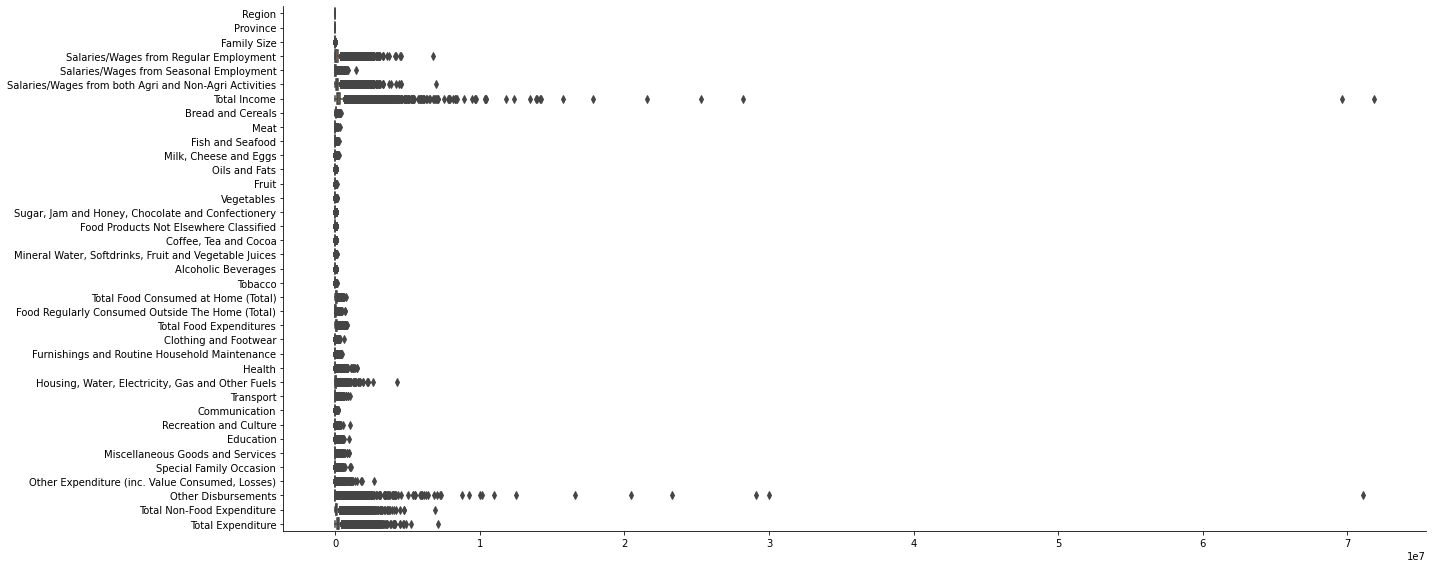

In [23]:
boxplot = sns.catplot(data=main_db, kind="box", height=8, aspect=2.5, orient="h");

In [24]:
from scipy.stats import zscore

z_scores = zscore(main_db[["Total Income","Other Disbursements","Total Expenditure"]]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
filtered_entries = (abs_z_scores < 3).all(axis=1)

main_db[filtered_entries]

,Region Name,Province Name,Region,Province,Family Size,Salaries/Wages from Regular Employment,Salaries/Wages from Seasonal Employment,Salaries/Wages from both Agri and Non-Agri Activities,Total Income,Bread and Cereals,...,Transport,Communication,Recreation and Culture,Education,Miscellaneous Goods and Services,Special Family Occasion,"Other Expenditure (inc. Value Consumed, Losses)",Other Disbursements,Total Non-Food Expenditure,Total Expenditure
0,Ilocos Region (Region I),Ilocos Norte,1,28,1.0,0,0,0,279305,4958,...,0,0,0,0,4116,0,100,102000,38536,98675
1,Ilocos Region (Region I),Ilocos Norte,1,28,6.0,0,79800,79800,143846,33030,...,3138,210,540,1050,9156,0,350,0,37240,136639
2,Ilocos Region (Region I),Ilocos Norte,1,28,3.0,86840,32710,119550,160491,20419,...,6708,960,0,0,12156,0,680,19200,54782,123410
3,Ilocos Region (Region I),Ilocos Norte,1,28,4.0,0,0,0,670698,20926,...,21480,1560,22620,31400,11784,2500,700,350000,219081,333393
4,Ilocos Region (Region I),Ilocos Norte,1,28,3.0,101896,34000,135896,259974,23616,...,24000,14328,0,0,20010,2500,1150,8702,149503,245637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144886,MIMAROPA (Region IV-B),Romblon,17,59,2.5,159400,26667,186067,382676,17808,...,19920,3372,1320,0,13380,11000,16067,123060,123069,185907
144887,MIMAROPA (Region IV-B),Romblon,17,59,7.0,5400,0,5400,184325,39800,...,6720,720,905,1740,10776,6500,260,8000,57750,147952
144888,MIMAROPA (Region IV-B),Romblon,17,59,3.0,867671,0,867671,900861,23642,...,16764,6240,4545,5500,96654,12500,40799,283776,299890,427744
144889,MIMAROPA (Region IV-B),Romblon,17,59,6.0,29500,2000,31500,65255,29666,...,1110,0,744,190,3672,2500,110,0,24552,75222


In [25]:
# boxplot = sns.catplot(data=main_db[filtered_entries], kind="box", height=8, aspect=2.5, orient="h");

In [26]:
# dur_dist_user_plot = sns.jointplot(data=main_db, 
#                                    x="Total Expenditure", 
#                                    y="Total Income", 
#                                    alpha=0.5)
# dur_dist_user_plot.set_axis_labels("Trip duration (min)", "Trip distance (km)", labelpad=10)
# dur_dist_user_plot.fig.set_size_inches(10.5, 6.5)

In [27]:
main_db['Income Difference'] = main_db['Total Income'] - main_db['Total Expenditure']
main_db

<ipython-input-27-d86385eb3d74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_db['Income Difference'] = main_db['Total Income'] - main_db['Total Expenditure']


,Region Name,Province Name,Region,Province,Family Size,Salaries/Wages from Regular Employment,Salaries/Wages from Seasonal Employment,Salaries/Wages from both Agri and Non-Agri Activities,Total Income,Bread and Cereals,...,Communication,Recreation and Culture,Education,Miscellaneous Goods and Services,Special Family Occasion,"Other Expenditure (inc. Value Consumed, Losses)",Other Disbursements,Total Non-Food Expenditure,Total Expenditure,Income Difference
0,Ilocos Region (Region I),Ilocos Norte,1,28,1.0,0,0,0,279305,4958,...,0,0,0,4116,0,100,102000,38536,98675,180630
1,Ilocos Region (Region I),Ilocos Norte,1,28,6.0,0,79800,79800,143846,33030,...,210,540,1050,9156,0,350,0,37240,136639,7207
2,Ilocos Region (Region I),Ilocos Norte,1,28,3.0,86840,32710,119550,160491,20419,...,960,0,0,12156,0,680,19200,54782,123410,37081
3,Ilocos Region (Region I),Ilocos Norte,1,28,4.0,0,0,0,670698,20926,...,1560,22620,31400,11784,2500,700,350000,219081,333393,337305
4,Ilocos Region (Region I),Ilocos Norte,1,28,3.0,101896,34000,135896,259974,23616,...,14328,0,0,20010,2500,1150,8702,149503,245637,14337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144886,MIMAROPA (Region IV-B),Romblon,17,59,2.5,159400,26667,186067,382676,17808,...,3372,1320,0,13380,11000,16067,123060,123069,185907,196769
144887,MIMAROPA (Region IV-B),Romblon,17,59,7.0,5400,0,5400,184325,39800,...,720,905,1740,10776,6500,260,8000,57750,147952,36373
144888,MIMAROPA (Region IV-B),Romblon,17,59,3.0,867671,0,867671,900861,23642,...,6240,4545,5500,96654,12500,40799,283776,299890,427744,473117
144889,MIMAROPA (Region IV-B),Romblon,17,59,6.0,29500,2000,31500,65255,29666,...,0,744,190,3672,2500,110,0,24552,75222,-9967


In [28]:
main_db.to_csv('Filtered FIES2018.csv')

c:\users\jeffc\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


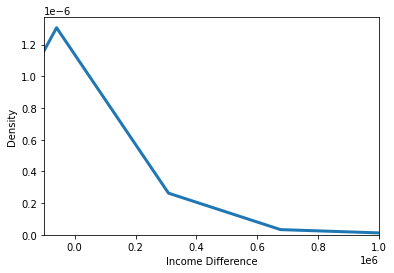

In [29]:
sns.distplot(main_db['Income Difference'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})

plt.xlim([-100000, 1000000])
plt.show()

c:\users\jeffc\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


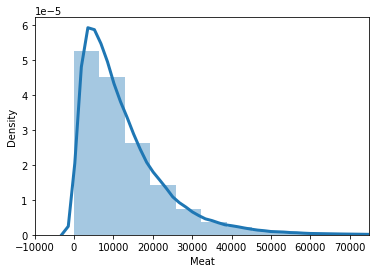

In [30]:
sns.distplot(main_db['Meat'], hist = True, kde = True,
                 kde_kws = {'linewidth': 3})

plt.xlim([-10000, 75000])
plt.show()

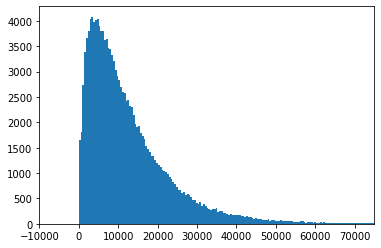

In [31]:
plt.hist(main_db['Meat'],bins='auto')
plt.xlim([-10000, 75000])
plt.show()

In [32]:
df = main_db.groupby('Province Name')['Health'].nunique()
df

Province Name
Abra                    824
Agusan del Norte       1609
Agusan del Sur          970
Aklan                  1296
Albay                  1090
                       ... 
Tawi-Tawi               539
Zambales               2003
Zamboanga Sibugay       997
Zamboanga del Norte     888
Zamboanga del Sur      1631
Name: Health, Length: 81, dtype: int64

In [33]:

dff = main_db.groupby('Region Name')['Total Expenditure'].mean()
pd.DataFrame(dff)

,Total Expenditure
Region Name,
Autonomous Region of Muslim Mindanao (ARMM),123266.045762
Bicol Region (Region V),190365.954995
CALABARZON (Region IV-A),287694.527132
Cagayan Valley (Region II),186800.352501
Caraga (Region XIII),188060.724002
Central Luzon (Region III),275865.700940
Central Visayas (Region VII),215716.634806
Cordillera Administrative Region (CAR),210801.826306
Davao Region (Region XI),178963.444913


In [34]:
dff = main_db[['Province Name']] 
dff = dff[dff['Province Name']=="Cebu"].count()
dff

Province Name    4642
dtype: int64

In [35]:
df_group_count = main_db[['Region Name']]
df_group_count = df_group_count[df_group_count['Region Name']=="Metropolitan Manila"].count()
df_group_count

Region Name    17977
dtype: int64

In [36]:
dff = main_db.groupby('Province Name')['Health'].agg(lambda x: x.ne(0).sum())
pd.DataFrame(dff)

,Health
Province Name,
Abra,1322
Agusan del Norte,2687
Agusan del Sur,1389
Aklan,1450
Albay,1381
...,...
Tawi-Tawi,1237
Zambales,2442
Zamboanga Sibugay,1319


In [37]:
df_actual=main_db[['Region Name',"Meat"]]
    
df_actual.columns = ['region', 'filter']

df_true = df_actual.groupby('region').mean().reset_index()

df_group_count = main_db[['Region Name']]
df_group_count = df_group_count.groupby('Region Name').size().reset_index()

df_group_count.columns = ['region', 'count']

test = pd.merge(df_true,df_group_count)

test

,region,filter,count
0,Autonomous Region of Muslim Mindanao (ARMM),3182.174638,7255
1,Bicol Region (Region V),12046.020734,8199
2,CALABARZON (Region IV-A),17282.325989,7353
3,Cagayan Valley (Region II),13839.739248,6278
4,Caraga (Region XIII),10465.056149,7587
5,Central Luzon (Region III),18499.983823,11807
6,Central Visayas (Region VII),10940.437066,8056
7,Cordillera Administrative Region (CAR),12029.130710,8538
8,Davao Region (Region XI),10992.067442,6880
9,Eastern Visayas (Region VIII),10560.485750,9509


In [46]:
data = {'filter': ['Sugar, Jam and Honey, Chocolate and Confectionery','Alcoholic Beverages','Tobacco','Recreation and Culture','Special Family Occasion','Health'
    ,'Education','Clothing and Footwear','Transport','Communication','Mineral Water, Softdrinks, Fruit and Vegetable Juices', 'Meat', 'Fish and Seafood'
    , 'Milk, Cheese and Eggs', 'Oils and Fats','Fruit','Vegetables','Coffee, Tea and Cocoa','Total Income'
,'Total Food Expenditures'
,'Total Non-Food Expenditure'
,'Total Expenditure', 'Income Difference','Essential/Non Esssential'], 
        'desc': ['Sugar, Jam and Honey, Chocolate and Confectionery','Alcoholic Beverages','Tobacco','Recreation and Culture','Special Family Occasion','Health'
    ,'Education','Clothing and Footwear','Transport','Communication','Mineral Water, Softdrinks, Fruit and Vegetable Juices', 'Meat', 'Fish and Seafood'
    , 'Milk, Cheese and Eggs', 'Oils and Fats','Fruit','Vegetables','Coffee, Tea and Cocoa','Total Income'
,'Total Food Expenditures'
,'Total Non-Food Expenditure'
,'Total Expenditure', 'Income Difference','Essential/Non Esssential']}  
  
# Create DataFrame  
df = pd.DataFrame(data)  
  
# Print the output.  
print(df)  

df.to_csv('Filter Descriptions.csv')

                                               filter  \
0   Sugar, Jam and Honey, Chocolate and Confectionery   
1                                 Alcoholic Beverages   
2                                             Tobacco   
3                              Recreation and Culture   
4                             Special Family Occasion   
5                                              Health   
6                                           Education   
7                               Clothing and Footwear   
8                                           Transport   
9                                       Communication   
10  Mineral Water, Softdrinks, Fruit and Vegetable...   
11                                               Meat   
12                                   Fish and Seafood   
13                              Milk, Cheese and Eggs   
14                                      Oils and Fats   
15                                              Fruit   
16                             

In [39]:
ph_provinces = gpd.read_file(r'gadm36_PHL/gadm36_PHL_1.shp')
ph_regions = gpd.read_file(r'gadm36_PHL/Regions.shp')

In [40]:
ph_provinces

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
...,...,...,...,...,...,...,...,...,...,...,...
76,PHL,Philippines,PHL.77_1,Tawi-Tawi,None,None,Lalawigan|Probinsya,Province,1570,PH.TT,"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
77,PHL,Philippines,PHL.78_1,Zambales,None,None,Lalawigan|Probinsya,Province,155,PH.PN,"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ..."
78,PHL,Philippines,PHL.79_1,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,972,PH.ZN,"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7..."
79,PHL,Philippines,PHL.80_1,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,973,PH.ZS,"MULTIPOLYGON (((122.29816 6.87506, 122.29816 6..."


In [41]:
ph_regions

,REGION,geometry
0,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
1,Bicol Region (Region V),"MULTIPOLYGON (((122.98417 11.71056, 122.98333 ..."
2,CALABARZON (Region IV-A),"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ..."
3,Cagayan Valley (Region II),"MULTIPOLYGON (((122.47040 16.91995, 122.47040 ..."
4,Caraga (Region XIII),"MULTIPOLYGON (((126.41750 7.96417, 126.41778 7..."
5,Central Luzon (Region III),"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."
6,Central Visayas (Region VII),"MULTIPOLYGON (((123.27111 9.08476, 123.27173 9..."
7,Cordillera Administrative Region (CAR),"POLYGON ((121.37679 17.95473, 121.36825 17.939..."
8,Davao Region (Region XI),"MULTIPOLYGON (((125.39778 5.43583, 125.39778 5..."
9,Eastern Visayas (Region VIII),"MULTIPOLYGON (((125.07361 9.89472, 125.07333 9..."


(116.44448661804196,
 127.08919715881343,
 3.7627797603606865,
 21.894300889969095)

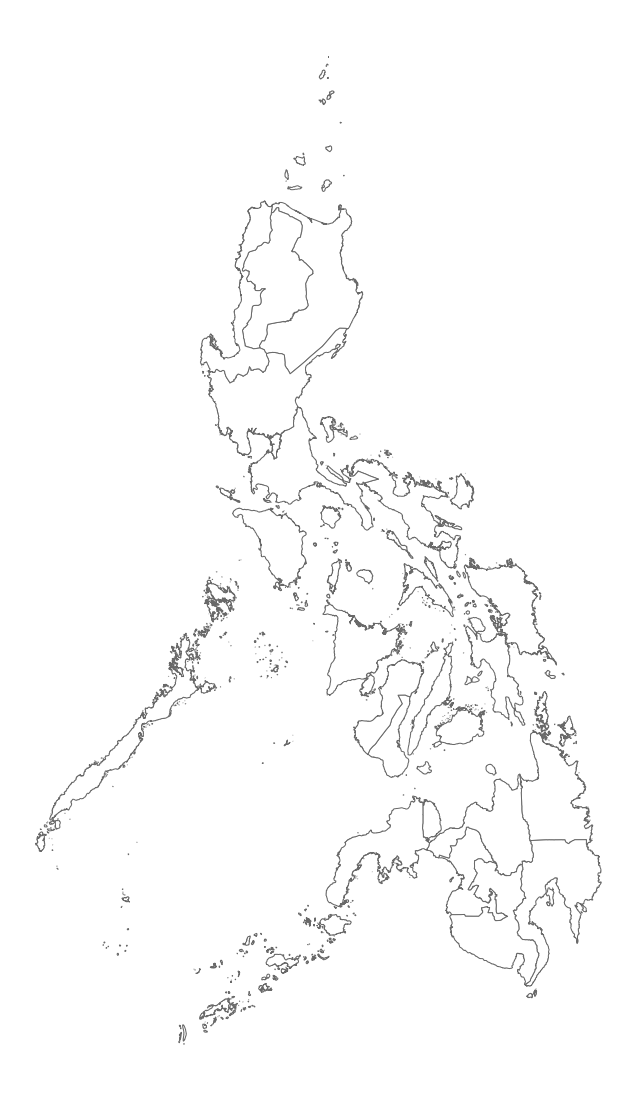

In [42]:
regions_map = ph_regions.plot(figsize=(30,20), color="w", edgecolor="dimgray")

regions_map.axis('off')

(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

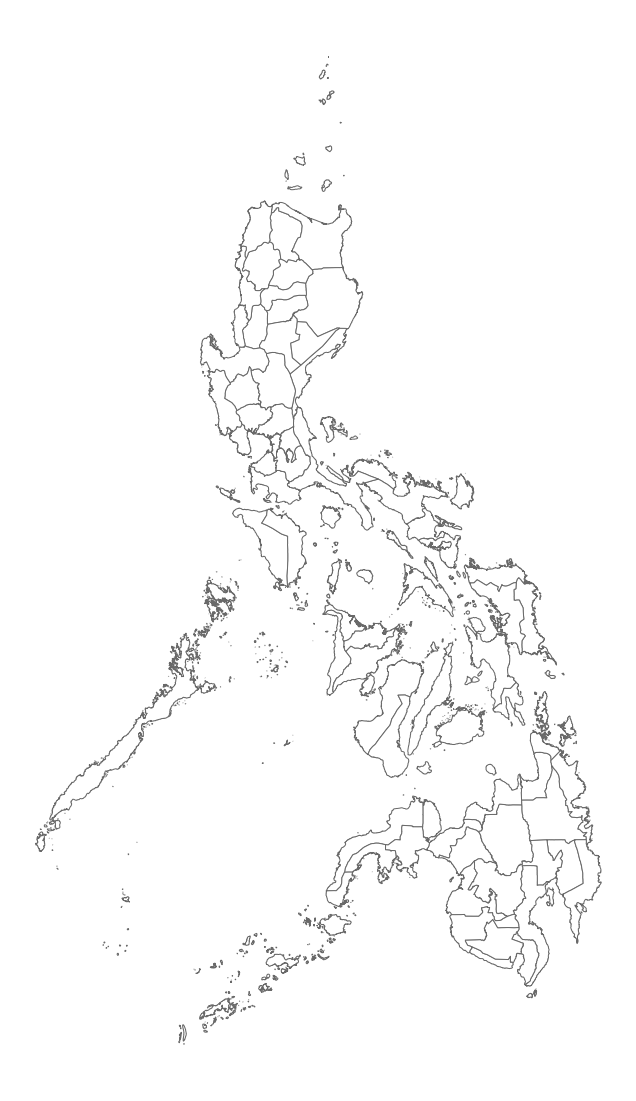

In [43]:
provinces_map = ph_provinces.plot(figsize=(30,20), color="w", edgecolor="dimgray")

provinces_map.axis('off')